<a href="https://colab.research.google.com/github/JaeHeee/NumPy_Tutorial/blob/master/code/%EB%B2%A1%ED%84%B0%ED%99%94%2C_%EC%A0%80%EC%9E%A5%EA%B3%BC_%EB%A1%9C%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 벡터화, 저장과 로딩

In [2]:
import numpy as np

## 벡터화

한 번에 하나씩 개별 배열 원소에 대해 연산을 실행하는 대신 배열 연산을 사용하면 훨씬 효율적인 코드를 만들 수 있다. 이를 *벡테화* 라고 한다. 이를 사용하여 넘파이의 최적화된 성능을 활용할 수 있다.

In [11]:
# 예를 들어, sin(xy/40.5)식을 기반으로 768x1024 크기 배열을 생성하려고 한다.
# 이때 중첩 반복문 안에 파이썬의 math함수를 사용하는 것은 나쁜 방법이다.
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5) # 매우 비효율적

In [12]:
# 벡터화를 진행. 먼저 넘파이 meshgrid 함수로 좌표 벡터를 사용해서 행렬을 생성
# X, Y 모두 768x1024 배열
# X에 있는 모든 값은 수평 좌표에 해당
# Y에 있는 모든 값은 수직 좌표에 해당
x_coords = np.arange(0, 1024)
y_coords = np.araㅍnge(0, 768)
X, Y = np.meshgrid(x_coords, y_coords)
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ...,
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [13]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

In [14]:
# 간단히 배열 연산을 사용해 계산 가능
data = np.sin(X*Y/40.5)

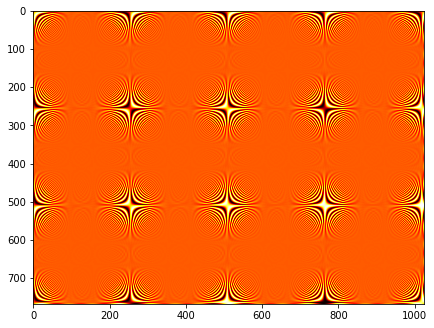

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot)
plt.show()

## 저장과 로딩

넘파이는 ndarray를 바이너리 또는 텍스트 포맷으로 손쉽게 저장하고 로드할 수 있다.

### 바이너리 .npy 포맷

In [16]:
# 랜덤 배열을 만들고 저장
a = np.random.rand(2, 3)
a

array([[0.52843568, 0.1004381 , 0.50326324],
       [0.98650083, 0.31200571, 0.39107689]])

In [17]:
# 파일 이름의 확장자를 지정하지 않았기 때문에 넘파이는 자동으로 .npy를 붙인다.
np.save("my_array", a)

In [18]:
with open("my_array.npy", "rb") as f:
    content = f.read()

content

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n\xfe\xdf\x1d\xf3\xf1\xe8\xe0?`\xca\xf8\xacO\xb6\xb9?\xa1\xe4\xc8\x83\xbb\x1a\xe0?\n\xa0\x82.j\x91\xef?\x1a\xbcn\xc9\xe6\xf7\xd3?*S[\\g\x07\xd9?"

In [19]:
# 이 파일을 넘파이 배열로 로드하려면 load 함수를 사용
a_loaded = np.load("my_array.npy")
a_loaded

array([[0.52843568, 0.1004381 , 0.50326324],
       [0.98650083, 0.31200571, 0.39107689]])

### 텍스트 포맷

In [20]:
# 배열을 텍스트 포맷으로 저장
np.savetxt("my_array.csv", a)

In [22]:
with open("my_array.csv", "rt") as f:
    print(f.read())

5.284356830952672279e-01 1.004380986494566308e-01 5.032632421417880808e-01
9.865008266833694694e-01 3.120057074656316098e-01 3.910768892213122294e-01



In [23]:
# 이 파일은 탭으로 구분된 csv 파일. 다른 구분자를 지정 가능
np.savetxt("my_array.csv", a, delimiter=",")

In [24]:
# 파일을 로드하려면 loadtxt 함수 사용
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.52843568, 0.1004381 , 0.50326324],
       [0.98650083, 0.31200571, 0.39107689]])

### 압축된 .npz 포맷

In [25]:
# 여러 개의 배열을 압축된 한 파일로 저장하는 것도 가능
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=uint8)

In [26]:
np.savez("my_arrays", my_a=a, my_b=b)

In [28]:
with open("my_arrays.npz", "rb") as f:
    content = f.read()
 
repr(content)[:180] + "[...]"

'b"PK\\x03\\x04\\x14\\x00\\x00\\x00\\x00\\x00\\x00\\x00!\\x00c.\\xdb\\xa9\\xb0\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\x08\\x00\\x14\\x00my_a.npy\\x01\\x00\\x10\\x00\\xb0\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\[...]'

In [29]:
# 파일을 로드
my_arrays = np.load("my_arrays.npz")
my_arrays

In [30]:
my_arrays.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f6eb8cc6198>)

In [31]:
my_arrays["my_a"]

array([[0.52843568, 0.1004381 , 0.50326324],
       [0.98650083, 0.31200571, 0.39107689]])